### Classification Modeling

#### Preparation Part 1: Loading & Exploring Penguins Data 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm

#classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#accuracy of the classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#### Load the Penguins dataset

In [4]:
df_penguins = sns.load_dataset("penguins")

In [5]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df_penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df_penguins.describe(include = ["O"])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [9]:
df_penguins = df_penguins[df_penguins["sex"].notnull()]

In [10]:
df_penguins.describe(include = ["O"])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


In [11]:
df_penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [13]:
df_penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

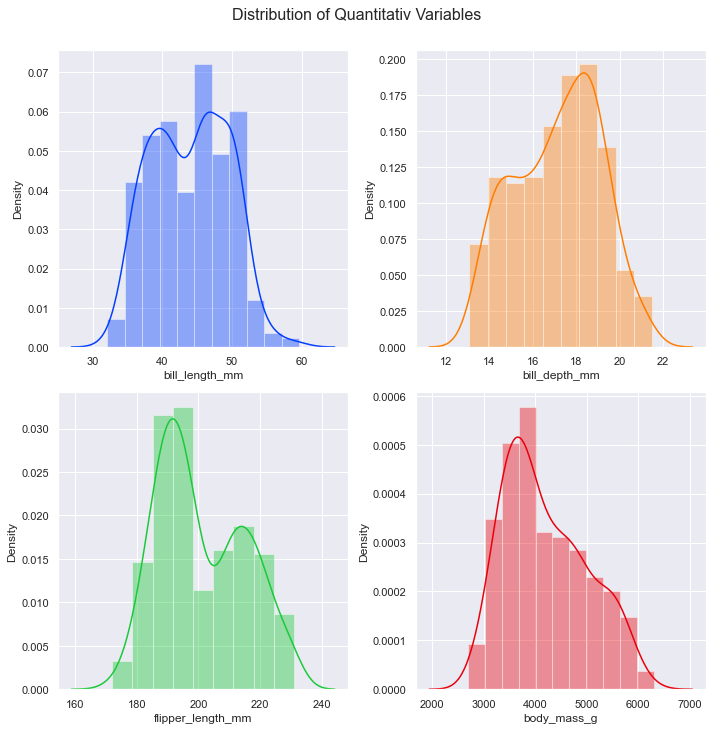

In [14]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.distplot(df_penguins["bill_length_mm"], color = colors[0], ax = axes[0,0])
sns.distplot(df_penguins["bill_depth_mm"], color = colors[1], ax = axes[0,1])
sns.distplot(df_penguins["flipper_length_mm"], color = colors[2], ax = axes[1,0])
sns.distplot(df_penguins["body_mass_g"], color = colors[3], ax = axes[1,1])

plt.suptitle("Distribution of Quantitativ Variables", y=1.01, size=16)
plt.tight_layout()
plt.show()

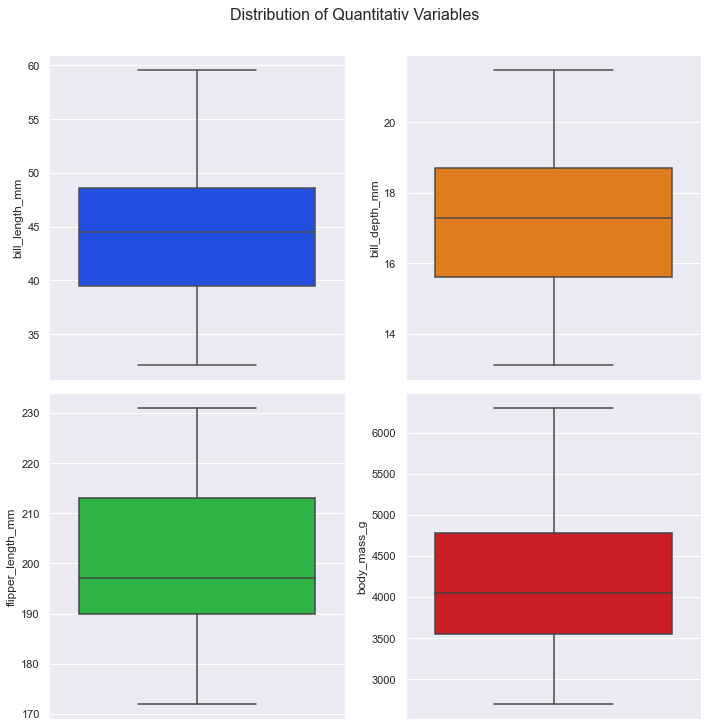

In [16]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y=df_penguins["bill_length_mm"], color = colors[0], ax = axes[0,0])
sns.boxplot(y=df_penguins["bill_depth_mm"], color = colors[1], ax = axes[0,1])
sns.boxplot(y=df_penguins["flipper_length_mm"], color = colors[2], ax = axes[1,0])
sns.boxplot(y=df_penguins["body_mass_g"], color = colors[3], ax = axes[1,1])

plt.suptitle("Distribution of Quantitativ Variables", y=1.01, size=16)
plt.tight_layout()
plt.show()

#### Preparation Part 2: Cleaning & Preparing Penguins Data

In [17]:
df_penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

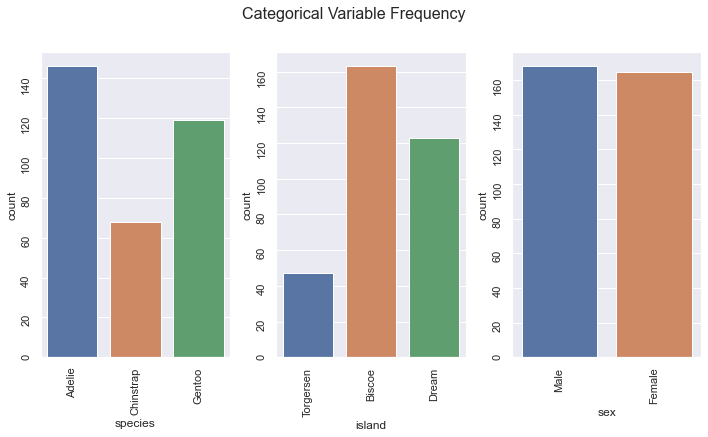

In [20]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(1,3, figsize = (10,6))

sns.countplot(x="species", data = df_penguins, ax = axes[0])
sns.countplot(x="island", data = df_penguins, ax = axes[1])
sns.countplot(x="sex", data = df_penguins, ax = axes[2])

#quick for loop to rotate the axis labels
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    
plt.suptitle("Categorical Variable Frequency", y=1.01, size=16)
plt.tight_layout()
plt.show()